<a href="https://colab.research.google.com/github/WoradeeKongthong/face_recognition_with_VGGFace/blob/main/celebrities_face_recognition_with_pre_trained_VGGFace2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
! pip install Keras-Applications

     |████████████████████████████████| 50 kB 4.1 MB/s 


In [2]:
# install VGGFace2 from repository
!pip install git+https://github.com/yaledhlab/vggface.git

  Cloning https://github.com/yaledhlab/vggface.git to /tmp/pip-req-build-t7cy9j6w
  Running command git clone -q https://github.com/yaledhlab/vggface.git /tmp/pip-req-build-t7cy9j6w
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8351 sha256=6df791903f63e2b1d93c9e02fd59b1825fe6bd9dc17c0537669ec26e80fc9f35
  Stored in directory: /tmp/pip-ephem-wheel-cache-hntomodt/wheels/cc/ab/49/77f807c1d8c1f8b9fc8b1e7c94a22a94150076f1865ca6c5cf
Successfully built keras-vggface


In [10]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.2 MB/s 


In [11]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN
from PIL import Image
import requests

# Get test image from url

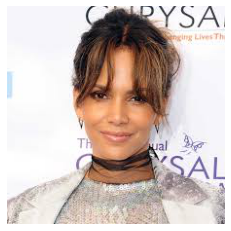

In [8]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8e9eayUZoXG-qI75fQEtS55Sc-jU8Jf_gSg&usqp=CAU'

img = Image.open(requests.get(url, stream=True).raw)
plt.imshow(img)
plt.axis('off')
plt.show()

# Extract face from image

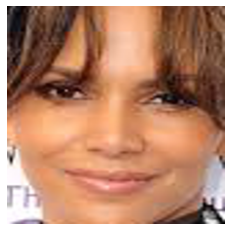

In [12]:
# convert image to array
img = image.img_to_array(img)

# extract face from the loaded image
face_detector = MTCNN()
faces = face_detector.detect_faces(img)
x, y, w, h = faces[0]['box']
face = img[y:y+h, x:x+w]

# reshape face for input of face recognition (VGGface)
face = image.array_to_img(face)
face = face.resize((224,224))

# convert image to array
face = image.img_to_array(face)

# show face
plt.imshow(face/255.)
plt.axis('off')
plt.show()

# Make prediction using pre-trained VGGFace2

Text(0.5, 1.0, 'Halle_Berry(99.9%)')

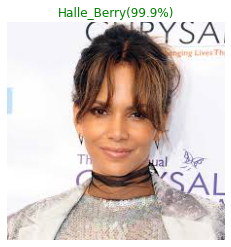

In [15]:
# create batch
sample = np.expand_dims(face, 0)

# preprocess input image vgg16(version=1), resnet50(version=2), senet50(version=2)
sample = preprocess_input(sample, version=2)

# create a pre-trained model
# vgg16(2015), resnet50(2017), senet50(2017)
face_recognizer = VGGFace(model='senet50')

# make prediction on well-known celebrity image
prediction = face_recognizer.predict(sample)
# print('Predicted:', decode_predictions(prediction))

# show image and prediction
plt.imshow(img/255.)
plt.axis('off')
if decode_predictions(prediction)[0][0][1] > 0.8 :
    fcolor = 'green'
else :
    fcolor = 'red'
plt.title(f"{decode_predictions(prediction)[0][0][0][3:-1]}({round(decode_predictions(prediction)[0][0][1]*100,2)}%)",
          color=fcolor)